In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams.update({
    "font.size": 15,  # Match LaTeX caption size
})

## $I_p$ at room temp

In [28]:
# Accel voltage is in units of Volts
accel_voltage1 = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
                          1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 
                          2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 
                          3, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 
                          4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5])

extravalues = np.array([5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7, 7.25, 7.5, 7.75, 8, 8.25, 8.5, 8.75, 9, 9.25, 9.5, 9.75, 
                  10, 10.25, 10.5, 10.75, 11, 11.25, 11.5, 11.75, 12, 12.25, 12.5, 12.75, 13, 13.25, 13.5, 13.75, 
                  14, 14.25, 14.5, 14.75, 15, 15.25, 15.5])

accel_voltage = np.concatenate((accel_voltage1, extravalues))

# defining accel voltge error, the reason for the V times 0 is that i had messed up the error formula later on in the lab and this enabled me to fix it
def accelvoltageerror(V):
    return (0 * V) + 0.01

accel_voltage_error = accelvoltageerror(accel_voltage)

# Plate Voltage is in units of 200mV
plate_voltage = np.array([0.02, 0.7, 1.5, 2.7, 4.1, 6, 7.8, 9.6, 11.4, 12.7,                           
                          13.7, 14.4, 14.9, 15.1, 15.1, 15, 14.8, 14.6, 14.3, 
                          14, 13.7, 13.4, 13.1, 12.8, 12.5, 12.3, 12, 11.8, 
                          11.6, 11.5, 11.4, 11.2, 11.1, 11, 10.9, 10.9, 10.8, 
                          10.8, 10.8, 10.8, 10.8, 10.8, 10.8, 10.9, 10.9, 10.9, 
                          10.9, 11, 11, 11, 11.1])

data = np.array([11.2, 11.4, 11.7, 12, 12.4, 12.9, 13.5, 14.1, 14.7, 15.4, 
                 16.2, 17, 17.9, 19, 20.1, 21.5, 22.9, 24.6, 26.6, 28.8, 
                 31.3, 33.9, 36.6, 40.1, 44.2, 49, 54.7, 62.7, 75.1, 
                 102.9, 183.3])

combined = np.concatenate((plate_voltage, data))

combined2 = combined / 1000
data2 = np.array([0.547, 0.82, 1.131, 1.46, 1.77, 2.07, 2.37, 2.67, 2.98, 3.27, 3.59])

platevoltageroomtemp = np.concatenate((combined2, data2))

def plateshieldvoltageerror(V):
    return (0.005 * V) + 1e-4

platevoltageerror = plateshieldvoltageerror(platevoltageroomtemp)
# Defining the Plate Resistance:
plateresistance = 1e4
plateresistanceerror = 500 # gold band means a 5% tolerance on the resistance measured
# Defining the Shield Resistance:
shieldresistance = 1e2
shieldresistanceerror = 5 # Again assuming a 5% tolerance on the resistor

In [29]:
# Coding V = IR function to get I_p:

def Current(V, R):
    return V / R

I_p = Current(platevoltageroomtemp, plateresistance)

In [30]:
def CurrentError(I, sigmaV, V, sigmaR, R):
    return I * np.sqrt((sigmaV / V)**2 + (sigmaR / R)**2)

I_perror = CurrentError(I_p, platevoltageerror, platevoltageroomtemp, plateresistanceerror, plateresistance)

## $I_P*$ (at liquid nitrogen temperature)

In [31]:
platevoltageliquidnitrogen = np.array([
    2.1, 3.3, 4.9, 6.6, 8.3, 10.3, 12.4, 14.6, 16.9, 19, 21.2, 23.3, 25.5, 27.6, 
    29.8, 31.8, 33.9, 36.1, 38.4, 40.7, 43.3, 45.9, 48.5, 51.1, 53.8, 56.5, 59.3, 
    61.7, 64.7, 67.8, 70.6, 73.7, 76.6, 79.7, 82.9, 86.3, 89.5, 93.1, 95.9, 99.3, 
    102.7, 106.2, 109.7, 113.6, 117, 120.6, 124.1, 127.4, 130.9, 134, 137.4
])

extradata = np.array([
    0.143, 0.1515, 0.1604, 0.1688, 0.1774, 0.1857, 0.1934,
    0.201, 0.208, 0.216, 0.224, 0.233, 0.242, 0.251, 0.26, 0.27, 
    0.278, 0.286, 0.294, 0.301, 0.311, 0.318, 0.326, 0.334, 0.344, 
    0.354, 0.365, 0.376, 0.388, 0.401, 0.414, 0.427, 0.441, 0.457, 
    0.477, 0.508, 0.564, 0.648, 0.731, 0.807, 0.876, 0.951
])

platevoltageliquidnitrogen = platevoltageliquidnitrogen / 1000

platevoltageliquidnitrogen = np.concatenate((platevoltageliquidnitrogen, extradata))

platevoltageliquidnitrogenerror = plateshieldvoltageerror(platevoltageliquidnitrogen)

I_pstar = Current(platevoltageliquidnitrogen, plateresistance)
I_pstarerror = CurrentError(I_pstar, platevoltageliquidnitrogenerror, platevoltageroomtemp, plateresistanceerror, plateresistance)


## Setting up Scipy Curve Fit

In [32]:
def linemodel(x, m, c):
    return m * x + c 

def cubicapprox(x, a, b, c, d):
    return  a * x **3 + b * x ** 2 + c * x + d

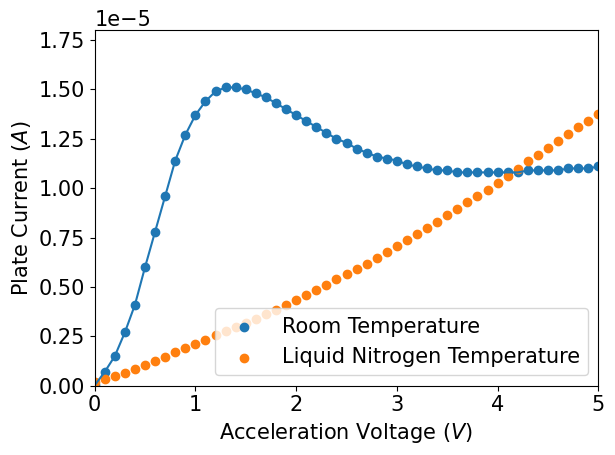

In [33]:
plt.scatter(accel_voltage, 10 * I_p, label = 'Room Temperature')
plt.plot(accel_voltage, 10 * I_p)
plt.scatter(accel_voltage, I_pstar, label = 'Liquid Nitrogen Temperature')
plt.xlabel('Acceleration Voltage $(V)$')
plt.ylabel('Plate Current $(A)$')
plt.legend()
plt.xlim(0, 5)
plt.ylim(0, 1.8 * 1e-5)
plt.tight_layout() # using this on all graphs to ensure that they fit the entire graph and labels when saved

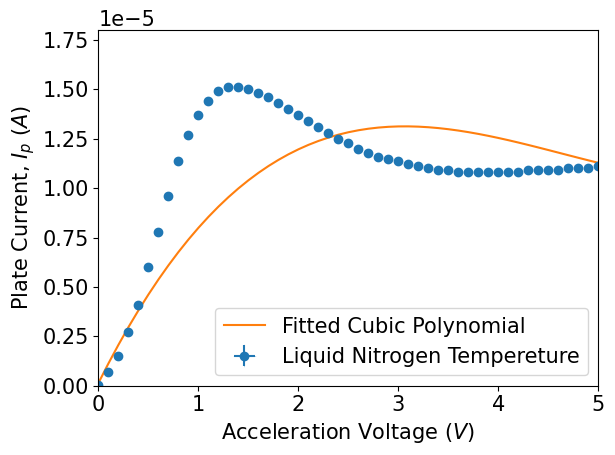

In [34]:
def cubicapprox(x, a, b, c, d):
    return  a * x **3 + b * x ** 2 + c * x + d

popt, pcov = curve_fit(cubicapprox, accel_voltage, I_p, sigma=I_perror)
plt.errorbar(accel_voltage, 10 * I_p, yerr=I_perror, xerr=accel_voltage_error, label='Liquid Nitrogen Tempereture', fmt='o', capsize=0.1)
rtmodelfit = cubicapprox(accel_voltage, *popt)
plt.plot(accel_voltage, 10 * rtmodelfit, label='Fitted Cubic Polynomial')
plt.xlabel('Acceleration Voltage $(V)$')
plt.ylabel('Plate Current, $I_p$ $(A)$')
plt.xlim(0, 5)
plt.ylim(0, 1.8 * 1e-5)
plt.legend()
plt.tight_layout()
plt.savefig('platecurrentcubicapprox.png')
plt.show()

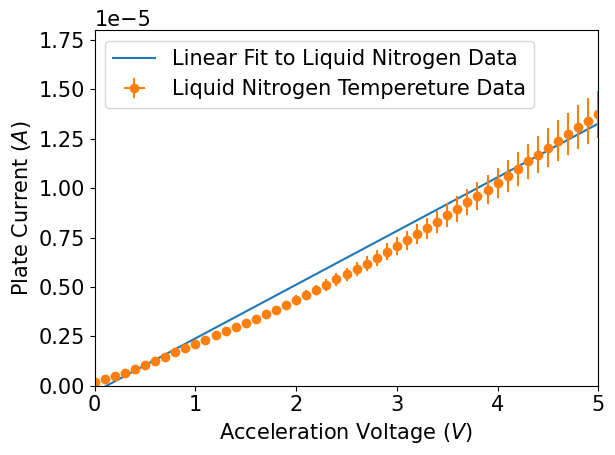

In [35]:
def linemodel(x, m, c):
    return m * x + c 

popt, pcov = curve_fit(linemodel, accel_voltage, I_pstar, sigma=I_pstarerror)
modelfit = linemodel(accel_voltage, *popt)
plt.plot(accel_voltage, modelfit, label='Linear Fit to Liquid Nitrogen Data')
plt.errorbar(accel_voltage, I_pstar, yerr=I_pstarerror, xerr=accel_voltage_error, label='Liquid Nitrogen Tempereture Data', fmt='o', capsize=0.1)
plt.xlabel('Acceleration Voltage $(V)$')
plt.ylabel('Plate Current $(A)$')
plt.xlim(0, 5)
plt.ylim(0, 1.8 * 1e-5)
plt.legend()
plt.tight_layout()
plt.savefig('platecurrentlinemodel.png')

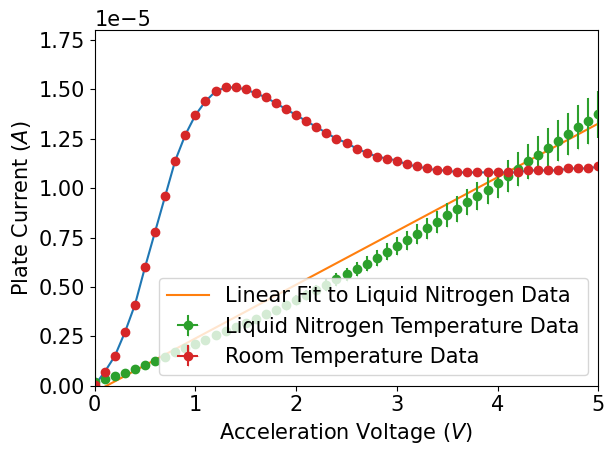

In [36]:
popt, pcov = curve_fit(linemodel, accel_voltage, I_pstar, sigma=I_pstarerror)
modelfit = linemodel(accel_voltage, *popt)
plt.errorbar(accel_voltage, 10 * I_p, yerr=I_perror, xerr=accel_voltage_error, capsize=0.1)
plt.plot(accel_voltage, modelfit, label='Linear Fit to Liquid Nitrogen Data')
plt.errorbar(accel_voltage, I_pstar, yerr=I_pstarerror, xerr=accel_voltage_error, label='Liquid Nitrogen Temperature Data', fmt='o', capsize=0.1)
plt.errorbar(accel_voltage, 10 * I_p, yerr=I_perror, xerr=accel_voltage_error, label='Room Temperature Data', fmt='o', capsize=0.1)
plt.xlabel('Acceleration Voltage $(V)$')
plt.ylabel('Plate Current $(A)$')
plt.xlim(0, 5)
plt.ylim(0, 1.8 * 1e-5)
plt.legend()
plt.tight_layout()
plt.savefig('platecurrent2temps.png')

## Probability of scattering, collision and the reciprocal mean free path

In [37]:
def pscatter(Ip, Ipstar, Is, Isstar):
    return 1 - ((Ip * Isstar) / (Is * Ipstar))

def pserror(Ip, Ips, Is, Iss, Iperror, Ipserror, Iserror, Isserror):
    return np.sqrt(((-Iss/ Is * Ips)*(Iperror))**2 + ((Ip * Iss/ Is * (Ips)**2)*(Ipserror))**2 + ((Ip * Iss/ (Is)**2 * Ips)*(Iserror))**2 + ((-Ip/ Is * Ips)*(Isserror))**2)

def electronmomentumerror(V, Vs, accelerror, shielderror):
    return (1/2) * ((V - Vs)**(-1/2)) * np.sqrt(accelerror**2 + shielderror**2)


## $I_s$

In [38]:
# measurements up to 200mV
shield_voltage_first_scale = np.array([
    1.1, 2.2, 4.1, 6.8, 9.6, 13.2, 16.9, 21, 25.5, 29.9,
    34.7, 39.6, 44.8, 50.1, 55.5, 60.5, 66, 71.8, 77.8, 83.7,
    89.8, 96.2, 102.4, 108.6, 114.9, 121.3, 127.8, 133.3, 139.7,
    146.2, 152.7, 159.2, 165.4, 171.8, 178.3, 185, 191.5, 198.3
])
# measurements up to 2V
shield_values_2V = np.array([
    0.204, 0.21, 0.217, 0.223, 0.23, 0.237, 0.244, 0.251, 0.258, 0.264, 
    0.271, 0.277, 0.284, 0.301, 0.318, 0.337, 0.355, 0.374, 0.394, 0.414, 
    0.435, 0.454, 0.476, 0.497, 0.519, 0.54, 0.562, 0.585, 0.609, 0.633, 
    0.656, 0.679, 0.704, 0.73, 0.756, 0.781, 0.807, 0.835, 0.864, 0.894, 
    0.93, 0.976, 1.056, 1.199, 1.582, 1.788, 1.99, 2.21, 2.42, 2.65, 
    2.89, 3.16, 3.44, 3.72, 4.01
])

sv = shield_voltage_first_scale / 1000

shield_values = np.concatenate((sv, shield_values_2V))
shield_values_error = plateshieldvoltageerror(shield_values)
shieldvoltage = np.array(shield_values)
sverror = plateshieldvoltageerror(shieldvoltage)

# Liquid Nitrogen Temperature shield voltage

shield_voltage_liquidnitrogen = np.array([
    2.8, 5, 7.9, 11.4, 14.7, 18.8, 23, 27.5, 32.3, 37, 42, 47.2, 
    52.6, 58.2, 63.8, 69.1, 74.9, 80.9, 87.1, 93.4, 99.9, 106.7, 
    113.3, 119.9, 126.6, 133.5, 140.4, 146.3, 153.3, 160.3, 167.4, 
    174.4, 181, 188.2, 195.4
])

svliquidnitrogen = shield_voltage_liquidnitrogen / 1000

data = np.array([
    0.202, 0.209, 0.217, 0.223, 0.231, 0.238, 0.246, 0.254, 0.262, 0.27, 
    0.278, 0.286, 0.294, 0.302, 0.31, 0.318, 0.336, 0.358, 0.381, 0.403, 
    0.426, 0.45, 0.476, 0.501, 0.525, 0.551, 0.576, 0.603, 0.631, 0.659, 
    0.686, 0.716, 0.744, 0.772, 0.801, 0.826, 0.867, 0.899, 0.928, 0.958, 
    0.988, 1.017, 1.044, 1.072, 1.1, 1.128, 1.155, 1.182, 1.21, 1.24, 
    1.27, 1.301, 1.337, 1.373, 1.41, 1.448, 1.484, 1.523
])

svliquidnitrogen = np.concatenate((svliquidnitrogen, data))
svlnerror = plateshieldvoltageerror(svliquidnitrogen)

I_s = Current(shieldvoltage, shieldresistance)
I_sstar = Current(svliquidnitrogen, shieldresistance)
I_serror = CurrentError(I_s, sverror, shieldvoltage, shieldresistanceerror, shieldresistance)
I_sstarerror = CurrentError(I_sstar, svlnerror, svliquidnitrogen, shieldresistanceerror, shieldresistance)

electronmomentum = np.sqrt(accel_voltage - shieldvoltage)
emerror = electronmomentumerror(accel_voltage, shieldvoltage, accel_voltage_error, sverror)

# Pscatter error
Pserror = pserror(I_p, I_pstar, I_s, I_sstar, I_perror, I_pstarerror, I_serror, I_sstarerror)

/tmp/ipykernel_3354/484412758.py:53: RuntimeWarning: invalid value encountered in sqrt
  electronmomentum = np.sqrt(accel_voltage - shieldvoltage)
/tmp/ipykernel_3354/2767338971.py:8: RuntimeWarning: invalid value encountered in power
  return (1/2) * ((V - Vs)**(-1/2)) * np.sqrt(accelerror**2 + shielderror**2)


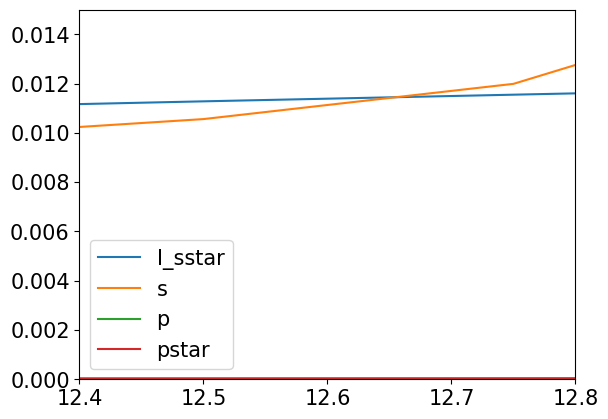

In [39]:
# analysing how pscatter behaves based on how each current increases over acceleration voltage
# as ps was a probability i imposed it was less than zero and the condition of I_s^* > I_s was found 
# this was not in line with what was seen below when changing the x and y lims, meaning that presumably the model itself for P_s breaks down after this point.
plt.plot(accel_voltage, I_sstar, label='I_sstar')
plt.plot(accel_voltage, I_s, label='s')
plt.plot(accel_voltage, I_p, label='p')
plt.plot(accel_voltage, I_pstar, label='pstar')
plt.ylim(0, 0.015)
plt.xlim(12.4, 12.8)
plt.legend()

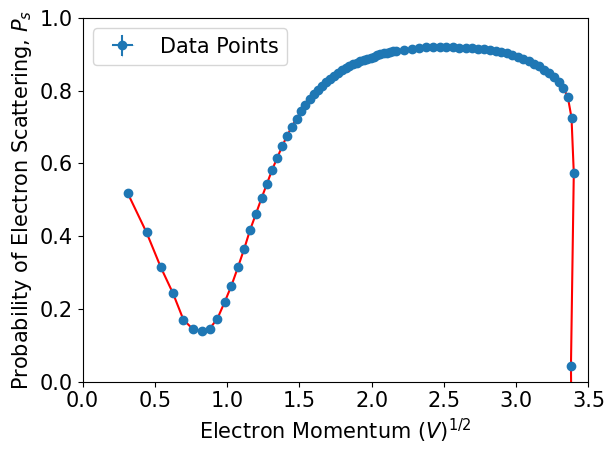

In [40]:
P_s = pscatter(I_p, I_pstar, I_s, I_sstar)
plt.errorbar(electronmomentum, P_s, yerr=Pserror, xerr=emerror, label='Data Points', fmt='o', capsize=0.1)
plt.xlabel('Electron Momentum $(V)^{1/2}$')
plt.ylabel('Probability of Electron Scattering, $P_s$')
plt.plot(electronmomentum, P_s, color='r')
plt.xlim(0, 3.5) 
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.savefig('pscattergraph.png')

In [41]:
def recipmfpl(l, Ps):
    l = 0.007
    return -((1/l) * np.log(1 - Ps))

def recipmfplerror(l, Ps, lerror, Pscaerror):
    return np.sqrt(((np.log(1 - Ps)/l **2)*(lerror))**2 + ((1/(l * (1 - Ps)))*(Pscaerror))**2)

reciplambda = np.array(recipmfpl(l=0.007, Ps=P_s))
reciplambdaerror = recipmfplerror(0.007, P_s, 0.0005, Pserror)

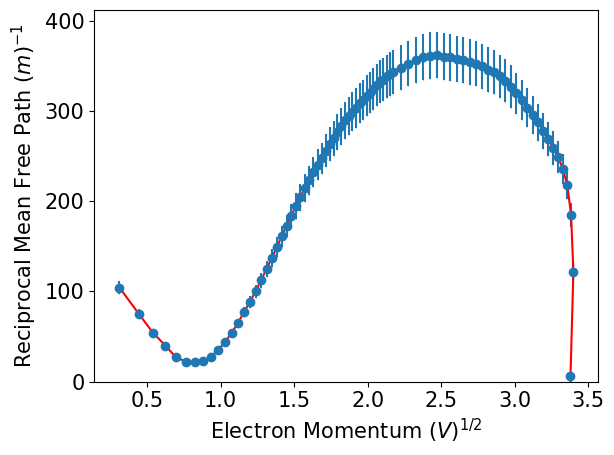

In [42]:
# Reciprocal of of the mean free path graph
plt.errorbar(electronmomentum, reciplambda, yerr=reciplambdaerror, xerr=emerror, label='Data Points', fmt='o', capsize=0.1)
plt.plot(electronmomentum, reciplambda, color='r')
plt.ylabel('Reciprocal Mean Free Path $(m)^{-1}$')
plt.xlabel('Electron Momentum $(V)^{1/2}$')
plt.ylim(0)
plt.tight_layout()
plt.savefig('recipmfp.png')

In [43]:
def Pcollison(P, oneoverlambda):
    return P * oneoverlambda

def pcolerrr(P, oneoverlambda, oneoverlambdaerror):
    return (P / oneoverlambda**2) * (oneoverlambdaerror)

def sqrtaccelerror(V, accelverror):
    return (1/(2 * np.sqrt(V))) * accelverror 

sqrtvoltageerror = sqrtaccelerror(accel_voltage, accel_voltage_error)

/tmp/ipykernel_3354/3305043621.py:8: RuntimeWarning: divide by zero encountered in divide
  return (1/(2 * np.sqrt(V))) * accelverror


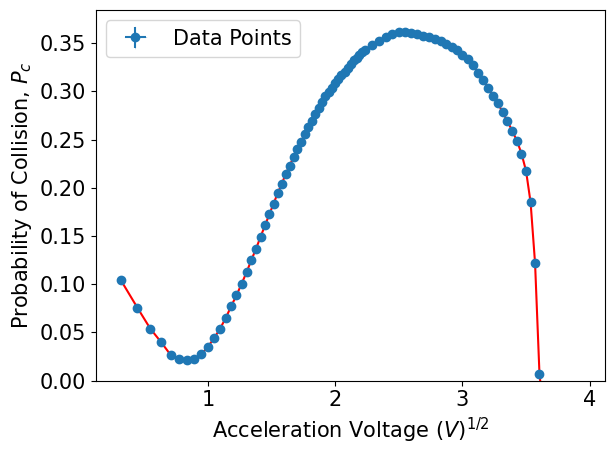

In [44]:
P_clntemp = Pcollison(P=1e-3, oneoverlambda=reciplambda) # in torr
P_cerrorln = pcolerrr(1e-3, reciplambda, reciplambdaerror) 
# plotting with zero point removed as it was not a meaningful point in the context of this experiment
plt.errorbar(np.sqrt(accel_voltage[1:]), P_clntemp[1:], yerr=P_cerrorln[1:], xerr=sqrtvoltageerror[1:], label='Data Points', fmt='o', capsize=0.1)
plt.plot(np.sqrt(accel_voltage[1:]), P_clntemp[1:], color='r')
plt.xlabel('Acceleration Voltage $(V)^{1/2}$')
plt.ylabel('Probability of Collision, $P_c$')
plt.ylim(0)
plt.legend()
plt.tight_layout()
plt.savefig('pcollntempconstP.png')

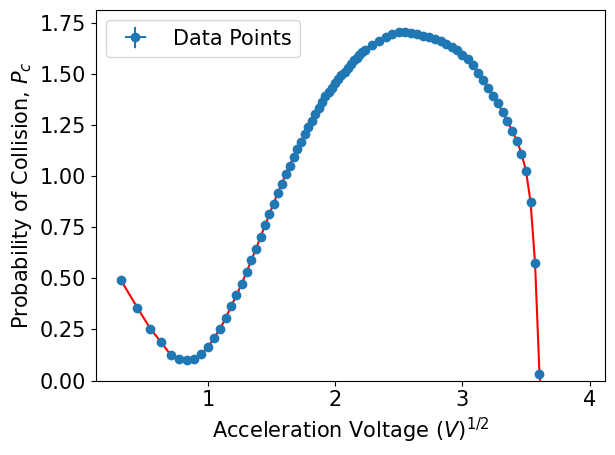

In [45]:
P_croomtemp = Pcollison(P=(4.717*1e-3), oneoverlambda=reciplambda) # in torr
P_cerrorroomtemp = pcolerrr((4.717*1e-3), reciplambda, reciplambdaerror) 
plt.errorbar(np.sqrt(accel_voltage[1:]), P_croomtemp[1:], yerr=P_cerrorroomtemp[1:], xerr=sqrtvoltageerror[1:], label='Data Points', fmt='o', capsize=0.1)
plt.plot(np.sqrt(accel_voltage[1:]), P_croomtemp[1:], color='r')
plt.xlabel('Acceleration Voltage $(V)^{1/2}$')
plt.ylabel('Probability of Collision, $P_c$')
plt.ylim(0)
plt.legend()
plt.tight_layout()
plt.savefig('pcolroomtempconstP.png')

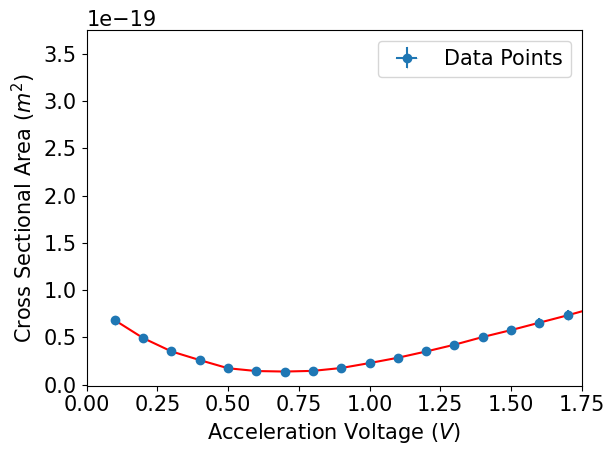

In [46]:
# Calcualting sigma the csa

def crosssectionalarea(reciplambda):
    return reciplambda * 1/(1.528 * (10 ** 21))

def csaerror(reciplambdaerr):
    return (1/(1.528 * (10 ** 21))) * reciplambdaerr

csaerr = csaerror(reciplambdaerror)

crosssectionalareas = crosssectionalarea(reciplambda=reciplambda)

plt.errorbar(accel_voltage[1:], crosssectionalareas[1:], yerr=csaerr[1:], xerr=accel_voltage_error[1:], label='Data Points', fmt='o', capsize=0.1)
plt.plot(accel_voltage[1:], crosssectionalareas[1:], color='r')
plt.xlabel('Acceleration Voltage $(V)$')
plt.ylabel('Cross Sectional Area $(m^{2})$')
plt.ylim(-.01e-19, 3.75e-19)
plt.xlim(0,1.75) # zooming in, this was reset for the larger graph produced in the report
plt.legend()
plt.tight_layout()
plt.savefig('crosssectionalareazoom.png')

## Extension

In [47]:
# retarding potential data
rp = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35])

# Shield Voltage data
shield_voltage = np.array([2.7, 2, 1.4, 0.9, 0.6, 0.3, 0.2, 0.1])
sv = shield_voltage / 1000

rperror = accelvoltageerror(rp)
sverr = plateshieldvoltageerror(sv)

xaxis = -(rp + sv)

# xaxis error by quadrature

def xaxiserr(rperr, sverror):
    return np.sqrt(rperr**2 + sverror**2)

xaxiserror = xaxiserr(rperror, sverr)

data = np.array([2.1, 1.5, 1.0, 0.6, 0.4, 0.2, 0.1, 0.1])

sverror = plateshieldvoltageerror(sv)
I_sstar = Current(sv, shieldresistance)
I_sstarerror = CurrentError(I_sstar, sverror, sv, shieldresistanceerror, shieldresistance)

line1 = np.array([[-0.0027, -10.51967369],
                 [-0.052, -10.81977828],
                 [-0.1014, -11.17645323],
                 [-0.1509, -11.61828598]])

line2 = np.array([[-0.2006, -12.02375109],
                 [-0.2503, -12.71689827],
                 [-0.3002, -13.12236338],
                 [-0.3501, -13.81551056]])

l1I_sstarerror = np.array([1.16667262e-06, 1.11803399e-06, 1.07912001e-06, 1.04886844e-06])
l2I_sstarerror = np.array([1.03174609e-06, 1.01544325e-06, 1.01019800e-06, 1.00504975e-06])

popt1, pcov1 = curve_fit(linemodel, line1[:, 0], line1[:,1], sigma=l1I_sstarerror)
modelfit1 = linemodel(line1[:, 0], *popt1)
popt2, pcov2 = curve_fit(linemodel, line2[:, 0], line2[:,1], sigma=l2I_sstarerror)
modelfit2 = linemodel(line2[:, 0], *popt2)

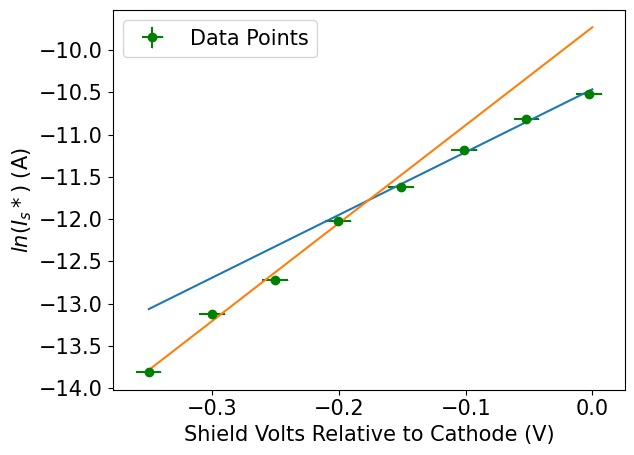

In [48]:
# extending each line to find the point of intersection
xextended = np.linspace(-0.35, 0, 50)

plt.errorbar(xaxis, np.log(I_sstar), yerr=I_sstarerror, xerr=xaxiserror, label='Data Points', fmt='o', capsize=0.1, color='g')

modelfit1extended = linemodel(xextended, *popt1)
modelfit2extended = linemodel(xextended, *popt2)
plt.plot(xextended, modelfit1extended)
plt.plot(xextended, modelfit2extended)
plt.xlabel('Shield Volts Relative to Cathode (V)')
plt.ylabel('$ln(I_{s}*)$ (A)')
plt.legend()
plt.tight_layout()
plt.savefig('logextensiongraph.png')

In [49]:
# letting ys equal eachother to find the point of intersection
m1, c1 = popt1
m1error = np.sqrt(pcov1[0, 0])
c1error = np.sqrt(pcov1[1,1])
m2, c2 = popt2
xvalpoi = (c1 - c2) / (m1 - m2)
print(f"Contact Potential $V_c$: {xvalpoi}")
V_c = xvalpoi

# calcualting the error on the contact potential:
vm1 = pcov1[0, 0]
vc1 = pcov1[1, 1]
cvm1c1 = pcov1[0, 1]
vm2 = pcov2[0, 0]
vc2 = pcov2[1, 1]
cvm2c2 = pcov2[0, 1]

def vcerr(m1, m2, c1, c2, vm1, vc1, cvm1c1, vm2, vc2, cvm2c2):
    return np.sqrt(((-(c1 - c2)/((m1 - m2)**2))**2)*(vm1) + (((c1 - c2)/((m1 - m2)**2))**2)*(vm2) + (((1)/((m1 - m2)))**2)*(vc1) + (((-1)/((m1 - m2)))**2)*(vc2) + (2 * ((-(c1 - c2)/((m1 - m2)**2))) * ((1)/((m1 - m2))) * cvm1c1) + (2 * (((c1 - c2)/((m1 - m2)**2))) * ((-1)/((m1 - m2))) * cvm2c2))

V_cerror = vcerr(m1=m1, m2=m2, c1=c1, c2=c2, vm1=vm1, vc1=vc1, cvm1c1=cvm1c1, vm2=vm2, vc2=vc2, cvm2c2=cvm2c2)
print(f"Error on $V_c$ {V_cerror}")

Vbar = (3/2) * (1/m1)
print('Mean thermionic emission energy of electrons: $Vbar$', f"{Vbar}")

# calculating vbar error
vbarerror = np.abs((-3/2) * (1/m1**2)) * m1error
print('Error on Vbar: ' f"{vbarerror}")

Contact Potential $V_c$: 0.1766304184136412
Error on $V_c$ 0.025594044355432718
Mean thermionic emission energy of electrons: $Vbar$ 0.20175664177869862
Error on Vbar: 0.01231988055510638


$V_{c} = 0.18 \pm 0.03$
$\\$
$\bar{V} = 0.20 \pm 0.01$

In [50]:
xaxis = np.sqrt(accel_voltage - shield_values + V_c + Vbar)

# finding corresponding max and min vals x axis values

print(np.argmax(P_clntemp[1:]), np.argmin(P_clntemp[1:50]))
print(len(P_clntemp[1:]))

print(np.argmax(P_croomtemp[1:]), np.argmin(P_croomtemp[1:50]))
print(len(P_croomtemp[1:]))

def emmtmerror(V, V_s, Vc, V_bar, Verr, Vserr, Vcerr, Vbarerr):
    return ((1/2) * ((V - V_s + Vc + V_bar)**(-1/2))) * np.sqrt(Verr**2 + Vserr**2 + Vcerr**2 + Vbarerr**2)

emmtmerr = emmtmerror(accel_voltage, shield_values, V_c, Vbar, accel_voltage_error, shield_values_error, V_cerror, vbarerror)

print('Original electron momentum minimum value for P_c', np.sqrt(accel_voltage)[7], '$\pm$', sqrtvoltageerror[7])
print('Original electron momentum max value for P_c', np.sqrt(accel_voltage)[56], '$\pm$', sqrtvoltageerror[56])

print('Corrected electron momentum minimum value for P_c', xaxis[7], '$\pm$', emmtmerr[7])
print('Corrected electron momentum max value for P_c', xaxis[56], '$\pm$', emmtmerr[56])

55 6
92
55 6
92
Original electron momentum minimum value for P_c 0.8366600265340756 $\pm$ 0.005976143046671968
Original electron momentum max value for P_c 2.5495097567963922 $\pm$ 0.0019611613513818406
Corrected electron momentum minimum value for P_c 1.0282932753802974 $\pm$ 0.014642900248369185
Corrected electron momentum max value for P_c 2.5464459664780517 $\pm$ 0.005926839971651439


<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_3354/3272729114.py:16: SyntaxWarning: invalid escape sequence '\p'
  print('Original electron momentum minimum value for P_c', np.sqrt(accel_voltage)[7], '$\pm$', sqrtvoltageerror[7])
/tmp/ipykernel_3354/3272729114.py:17: SyntaxWarning: invalid escape sequence '\p'
  print('Original electron momentum max value for P_c', np.sqrt(accel_voltage)[56], '$\pm$', sqrtvoltageerror[56])
/tmp/ipykernel_3354/3272729114.py:19: SyntaxWarning: invalid escape sequence '\p'
  print('Corrected electron momentum minimum value for P_c', xaxis[7], '$\pm$', emmtmerr[7])
/tmp/ipykernel_3354/3

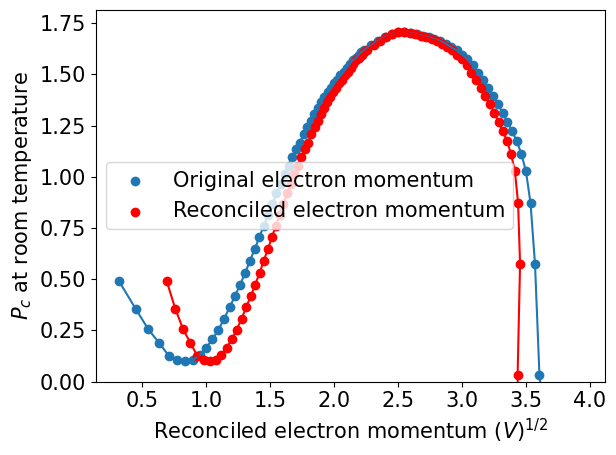

In [51]:
xaxis = np.sqrt(accel_voltage - shield_values + V_c + Vbar)

plt.scatter(np.sqrt(accel_voltage[1:]), P_croomtemp[1:], label='Original electron momentum')
plt.plot(np.sqrt(accel_voltage[1:]), P_croomtemp[1:])
plt.scatter(xaxis[1:], P_croomtemp[1:], color='r', label='Reconciled electron momentum')
plt.plot(xaxis[1:], P_croomtemp[1:], color='r')
plt.xlabel('Reconciled electron momentum $(V)^{1/2}$')
plt.ylabel('$P_c$ at room temperature')
plt.ylim(0)
plt.legend()
plt.tight_layout()
plt.savefig('extcorrectedelectronmomentumroomtemp.png')

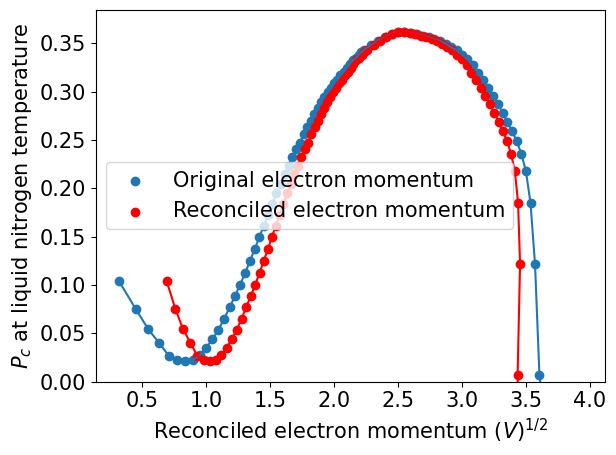

In [52]:
plt.scatter(np.sqrt(accel_voltage[1:]), P_clntemp[1:], label='Original electron momentum')
plt.plot(np.sqrt(accel_voltage[1:]), P_clntemp[1:])
plt.scatter(xaxis[1:], P_clntemp[1:], color='r', label='Reconciled electron momentum')
plt.plot(xaxis[1:], P_clntemp[1:], color='r')
plt.xlabel('Reconciled electron momentum $(V)^{1/2}$')
plt.ylabel('$P_c$ at liquid nitrogen temperature')
plt.ylim(0)
plt.legend()
plt.tight_layout()
plt.savefig('extcorrectedelectronmomentumlntemp.png')